# Brain Tumor Detection using CNN Model
**Importing important Libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import cv2 as cv
from keras import ops
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import L1

# Importing Dataset

In [3]:
data_dir = keras.utils.get_file(fname='MRI', origin='/datasets/MRI', cache_dir='.', untar=False)
data_dir

'.\\datasets\\MRI'

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/MRI')

In [5]:
len(list(data_dir.glob('*/*/*.jpg')))

7023

# Converting data into different categories

In [6]:
category_dict = {
    'glioma' : list(data_dir.glob('*/glioma/*')),
    'meningioma' : list(data_dir.glob('*/meningioma/*')),
    'pituitary' : list(data_dir.glob('*/pituitary/*')),
    'notumor' : list(data_dir.glob('*/notumor/*')),
}

In [7]:
data_num = {
    'glioma' : 0,
    'meningioma' : 1,
    'pituitary' : 2,
    'notumor' : 3,
}

# Reading image

In [8]:
import PIL as p

In [ ]:
plt.figure(figsize=(10, 10))

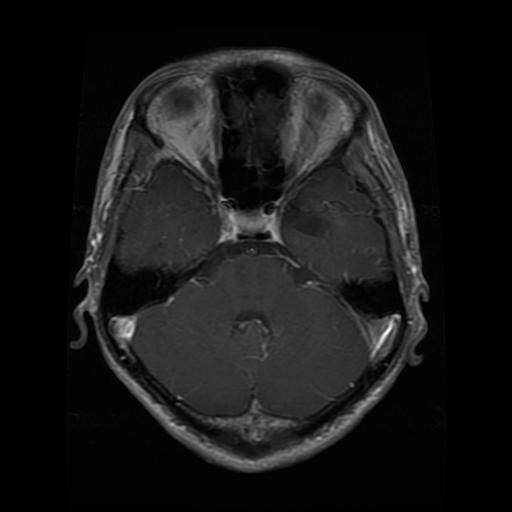

In [10]:
img = p.Image.open(str(category_dict['glioma'][1]))
img

# Converting Images to 3D-array using Open CV

In [11]:
x = []
y = []
for cat_name, images in category_dict.items():
    for image in images:
        img = cv.imread(str(image), cv.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Could not read image {image}")
            continue 
        res_img = cv.resize(img, (128, 128))
        x.append(res_img)
        y.append(data_num[cat_name])
x = np.array(x, dtype = 'float32')
y = np.array(y, dtype = 'int')
x.shape


(7023, 128, 128)

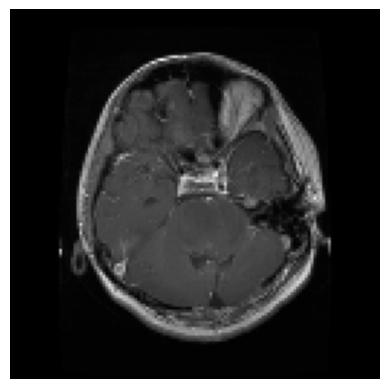

In [12]:
plt.axis('off')
plt.imshow(x[10], cmap='gray')
plt.show()

In [13]:
x=x/255.0
x[5][30][30]

0.019607844

0

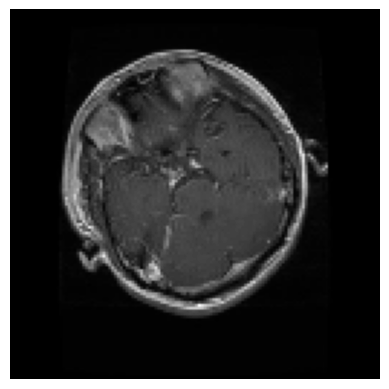

In [14]:
plt.axis('off')
plt.imshow(x[6], cmap='gray')
y[6]

In [15]:
from sklearn.model_selection import train_test_split as tts

# Spliting the data into training and testing 

In [16]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25)

In [17]:
x_train.shape

(5267, 128, 128)

# Making CNN Model and compiling it

In [18]:
model = Sequential([
    # CNN
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # ANN
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax') 
])

c:\Users\Jagrat Phugat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833,156 (3.18 MB)

 Trainable params: 833,156 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(x_train, y_train, batch_size=70, epochs=13)

Epoch 1/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 289ms/step - accuracy: 0.5237 - loss: 1.0245
Epoch 2/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - accuracy: 0.8214 - loss: 0.4510
Epoch 3/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.8664 - loss: 0.3534
Epoch 4/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - accuracy: 0.8985 - loss: 0.2885
Epoch 5/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.9303 - loss: 0.1946
Epoch 6/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.9481 - loss: 0.1503
Epoch 7/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.9703 - loss: 0.1000
Epoch 8/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - accuracy: 0.9719 - loss: 0.0757
Epoch 9/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - accuracy: 0.9689 - loss: 0.0965
Epoch 10/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - accuracy: 0.9860 - loss: 0.0447
Epoch 11/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.9909 - loss: 0.0300
Epoch 12/13
76/76 ━━━━━━━━━━━━━━━━━━━━ 19

In [21]:
model.evaluate(x_test,y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9276 - loss: 0.3564


[0.29776161909103394, 0.9396355152130127]

In [22]:
y_pred = np.array(np.argmax(model.predict(x_test), axis=1))

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


In [23]:
y_pred

array([2, 2, 0, ..., 0, 1, 0], dtype=int64)

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame({
    "Predicted" : y_pred,
    "Actual" : y_test
})
df

,Predicted,Actual
0,2,2
1,2,2
2,0,0
3,2,2
4,0,0
...,...,...
1751,0,0
1752,0,0
1753,0,0
1754,1,1
